## Redes Neurais Artificiais 2020.1

**Disciplina**: Redes Neurais Artificiais 2020.1  
**Professora**: Elloá B. Guedes (ebgcosta@uea.edu.br)  
**Github**: http://github.com/elloa  
        

Levando em conta a base de dados **_Forest Cover Type_**, esta terceira parte do Projeto Prático 3 diz respeito à proposição e avaliação de múltiplas redes neurais artificiais do tipo feedforward multilayer perceptron para o problema da classificação multi-classe da cobertura florestal em uma área do Roosevelt National Forest.

## Testando Redes Neurais sem os Atributos Categórios

1. Abra a base de dados em questão
2. Elimine todas as colunas relativas aos atributos categóricos
3. Armazene o atributo alvo em uma variável y e os atributos preditores em uma variável X
4. Efetue uma partição holdout 70/30 com o sklearn, distribuindo os exemplos de maneira aleatória
5. Efetue o escalonamento dos atributos

### Escalonando os atributos

O treinamento de uma rede neural artificial é mais eficiente quando os valores que lhes são fornecidos como entrada são pequenos, pois isto favorece a convergência. Isto é feito escalonando-se todos os atributos para o intervalo [0,1], mas precisa ser feito de maneira cautelosa, para que informações do conjunto de teste não sejam fornecidas no treinamento.

Há duas estratégias para tal escalonamento: normalização e padronização. Ambas possuem características particulares, vantagens e limitações, como é possível ver aqui: https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/


No nosso caso, vamos usar a padronização. Assim, com os atributos preditores do treinamento, isto é, X_train, deve-se subtrair a média e dividir pelo desvio padrão:

X_train_std = (X_train - np.mean(X_train))/np.std(X_train)

Em seguida, o mesmo deve ser feito com os atributos preditores do conjunto de testes, mas com padronização relativa ao conjunto de treinamento:

X_test_std = (X_test - np.mean(X_train))/np.std(X_train)

Se todo o conjunto X for utilizado na padronização, a rede neural receberá informações do conjunto de teste por meio da média e variância utilizada para preparar os dados de treinamento, o que não é desejável.


### Continuando

5. Treine uma rede neural multilayer perceptron para este problema com uma única camada e dez neurônios  
    5.1 Utilize a função de ativação ReLU  
    5.2 Utilize o solver Adam    
    5.3 Imprima o passo a passo do treinamento    
    5.4 Utilize o número máximo de épocas igual a 300  
6. Com o modelo em questão, após o treinamento, apresente:  
    6.1 Matriz de confusão para o conjunto de teste  
    6.2 Acurácia  
    6.3 F-Score  
    6.4 Precisão  
    6.5 Revocação  
7. Repita o treinamento da mesma rede anterior sem imprimir o passo a passo (verbose False) por 100 vezes  
    7.1 Cada uma destas repetições deve ser feita com uma nova partição Holdout  
    7.2 Apresente a média e o desvio padrão da acurácia e do F-Score para o conjunto de treino  
8. Repita por 100 vezes o treinamento desta mesma rede, mas utilizando o otimizador SGD  
    8.1 Apresente a média e o desvio padrão da acurácia e do F-Score para o conjunto de treino  
9. Houve influência da escolha do otimizador no desempenho da rede?

In [1]:
!pip install rich

     |████████████████████████████████| 163kB 3.4MB/s 
     |████████████████████████████████| 51kB 5.4MB/s 


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import random
from tqdm import trange
from rich.console import Console
from rich.table import Column, Table
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (plot_confusion_matrix, f1_score, precision_score, recall_score, accuracy_score, confusion_matrix)
from google.colab import drive

In [3]:
drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
dataset = pd.read_csv('/content/drive/My Drive/RNA/covtype.csv')
columns = list(dataset.columns)
r = re.compile("^(Wilderness_Area|Soil_Type)")
to_drop = list(filter(r.match, columns))
df = dataset.drop(columns=to_drop)

In [5]:
y = df["Cover_Type"]
x = df.drop(columns=["Cover_Type"])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, train_size=0.7)
y_classes = list(set(y_train.values))

In [6]:
x_train_std = (x_train - np.mean(x_train))/np.std(x_train)
x_test_std = (x_test - np.mean(x_train))/np.std(x_train)

In [7]:
MLPClassi = MLPClassifier(hidden_layer_sizes=(10),activation="relu", solver="adam", 
                          random_state=1, max_iter=300, 
                          verbose=True).fit(x_train_std, y_train)

Iteration 1, loss = 0.92729076
Iteration 2, loss = 0.70679827
Iteration 3, loss = 0.68856603
Iteration 4, loss = 0.68076394
Iteration 5, loss = 0.67438203
Iteration 6, loss = 0.66952351
Iteration 7, loss = 0.66682357
Iteration 8, loss = 0.66497742
Iteration 9, loss = 0.66353034
Iteration 10, loss = 0.66264020
Iteration 11, loss = 0.66186934
Iteration 12, loss = 0.66122371
Iteration 13, loss = 0.66058628
Iteration 14, loss = 0.65991115
Iteration 15, loss = 0.65923818
Iteration 16, loss = 0.65859331
Iteration 17, loss = 0.65809057
Iteration 18, loss = 0.65763233
Iteration 19, loss = 0.65723664
Iteration 20, loss = 0.65695260
Iteration 21, loss = 0.65663426
Iteration 22, loss = 0.65639680
Iteration 23, loss = 0.65615753
Iteration 24, loss = 0.65601329
Iteration 25, loss = 0.65582613
Iteration 26, loss = 0.65560019
Iteration 27, loss = 0.65557618
Iteration 28, loss = 0.65542085
Iteration 29, loss = 0.65532993
Iteration 30, loss = 0.65516032
Iteration 31, loss = 0.65513760
Iteration 32, los

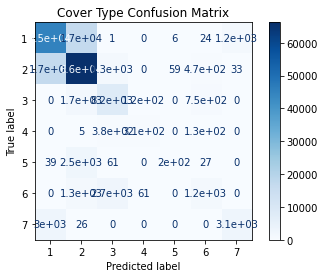

In [8]:
y_predicted = MLPClassi.predict(x_test_std)

disp = plot_confusion_matrix(MLPClassi, x_test_std, y_test,
                             display_labels=y_classes,
                             cmap=plt.cm.Blues,
                             normalize=None)
disp.ax_.set_title('Cover Type Confusion Matrix')
plt.show()

In [9]:
console = Console()
table = Table(show_header=True, header_style='bold magenta', show_lines=True)
table.add_column('Metric')
table.add_column('Value')
table.add_row(
    'F1-Score', f"{round(f1_score(y_test, y_predicted, average='macro'), 2)}"
)
table.add_row(
    'Accuracy', f"{round(accuracy_score(y_test, y_predicted), 2)}"
)
table.add_row(
    'Precision', f"{round(precision_score(y_test, y_predicted, average='macro'), 2)}"
)
table.add_row(
    'Recall', f"{round(recall_score(y_test, y_predicted, average='macro'), 2)}"
)
console.print(table)

┏━━━━━━━━━━━┳━━━━━━━┓
┃ Metric    ┃ Value ┃
┡━━━━━━━━━━━╇━━━━━━━┩
│ F1-Score  │ 0.52  │
├───────────┼───────┤
│ Accuracy  │ 0.71  │
├───────────┼───────┤
│ Precision │ 0.66  │
├───────────┼───────┤
│ Recall    │ 0.49  │
└───────────┴───────┘


In [10]:
def retrain(x, y, model):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, train_size=0.7)
    x_train_std = (x_train - np.mean(x_train))/np.std(x_train)
    x_test_std = (x_test - np.mean(x_train))/np.std(x_train)
    model.fit(x_train_std, y_train)
    y_predicted = model.predict(x_test_std)
    conf_matrix = confusion_matrix(y_test, y_predicted)
    f1_score_value = f1_score(y_test, y_predicted, average='macro')
    acc = accuracy_score(y_test, y_predicted)
    return f1_score_value, acc, confusion_matrix

def measures(x, y, model, model_name):
    f1_scores = []
    accs = []

    print(' This can take a while, why do not take a coffee?')
    for train_number in range(10):
        metrics = retrain(x, y, model)
        f1_scores.append(metrics[0])
        accs.append(metrics[1])
        conf_matrix = metrics[2]
    
    console = Console()
    table = Table(title=f"{model_name}",
                  show_header=True,
                  header_style='bold magenta',
                  show_lines=True)
    table.add_column('Metric')
    table.add_column('Mean')
    table.add_column('Std Deviation')
    f1_score_mean = round(np.array(f1_scores).mean(), 2)
    f1_score_std = round(np.array(f1_scores).std(), 2)
    accs_mean = round(np.array(accs).mean(), 2)
    accs_std = round(np.array(accs).std(), 2)
    table.add_row(
        'F1-Score', f"{f1_score_mean}", f"{f1_score_std}"
    )
    table.add_row(
        'Accuracy', f"{accs_mean}", f"{accs_std}"
    )
    console.print(table)
    return f1_score_mean, f1_score_std, accs_mean, accs_std, conf_matrix

In [11]:
MLPClassiADAM = MLPClassifier(hidden_layer_sizes=(10),activation="relu", solver="adam", 
                              random_state=1, max_iter=300, verbose=False)
obtained_measures = measures(x_train_std, y_train, MLPClassiADAM, "MLPClassifier with ADAM solver")

 This can take a while, why do not take a coffee?
  MLPClassifier with ADAM solver   
┏━━━━━━━━━━┳━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Metric   ┃ Mean ┃ Std Deviation ┃
┡━━━━━━━━━━╇━━━━━━╇━━━━━━━━━━━━━━━┩
│ F1-Score │ 0.51 │ 0.01          │
├──────────┼──────┼───────────────┤
│ Accuracy │ 0.72 │ 0.0           │
└──────────┴──────┴───────────────┘


In [12]:
MLPClassiSGD = MLPClassifier(hidden_layer_sizes=(10),activation="relu", solver="sgd", 
                          random_state=1, max_iter=300, verbose=False)
obtained_measures = measures(x, y, MLPClassiSGD, "MLPClassifier with SGD solver")

 This can take a while, why do not take a coffee?
   MLPClassifier with SGD solver   
┏━━━━━━━━━━┳━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Metric   ┃ Mean ┃ Std Deviation ┃
┡━━━━━━━━━━╇━━━━━━╇━━━━━━━━━━━━━━━┩
│ F1-Score │ 0.47 │ 0.01          │
├──────────┼──────┼───────────────┤
│ Accuracy │ 0.72 │ 0.0           │
└──────────┴──────┴───────────────┘


## Discussão

Nos passos anteriores, você avaliou o desempenho de uma única rede neural que contém os seguintes parâmetros: uma única camada oculta com 10 neurônios e função de ativação ReLU. O otimizador utilizado, quer seja SGD ou ADAM, trata-se do algoritmo para aproximar o gradiente do erro. Neste sentido, a escolha do otimizador é um hiperparâmetro, pois diz respeito a como a rede neural definida previamente atuará "em tempo de execução"  durante o processo de treinamento. Também são hiperparâmetros a quantidade de épocas, a taxa de aprendizado inicial, dentre outros.

Cabe alientar também que você efetuou o treinamento desta rede por 100 vezes e apresentou os resultados em termos de média +- desvio padrão. Lembre-se que em uma rede neural há a inicialização aleatória de pesos e, em consequência, o desempenho delas está sujeito à uma flutuação estocástica. A execução destas múltiplas vezes faz com que eliminemos algum viés introduzido por uma boa ou má "sorte" na escolha de pesos no caso de uma única execução.

Você também aprendeu uma estratégia para escalonar os atributos para uma melhor convergência da rede. Utilize-a em todos os treinamentos e testes propostos a seguir.

## Propondo Novas Arquiteturas

Variando  os parâmetros (uma ou duas camadas ocultas, com diferente números de neurônios em cada uma delas e a função de ativação) e o hiperparâmetros solver (Adam ou SGD) e o número de épocas (100,150 e 200), atenda ao que se pede:

1. Proponha 10 arquiteturas distintas de RNAs para o problema em questão, à sua escolha
2. Avalie cada uma das arquiteturas perante todos os hiperparâmetros apresentados por 100 vezes
3. Como resultado da avaliação, apresente:  
    3.1 Top-3 melhores redes no tocante à F-Score e Acurácia  
    3.2 Repetição em que houve o melhor desempenho de cada uma dessas redes: ilustre tp, tf, fp e fn  

In [13]:
hidden_layers_number = [1, 2]
epochs_number = [100, 150, 200]
solvers = ['adam', 'sgd']
activation_functions = ['identity', 'logistic', 'tanh', 'relu']

def tuple_rand_gen(number_of_elements, min, max):
  list_to_tuple = []
  for i in range(number_of_elements):
    neurons = random.randint(min, max)
    list_to_tuple.append(neurons)
  return tuple(list_to_tuple)

def random_architectures_generator(number_of_architectures, hidden_layers_number, epochs_number, solvers, act_funcs, min_neurons, max_neurons, verbose=False):
  '''
  Params:

  number_of_architetures (int): The number of random architectures to generate
  hidden_layers_number (list): List with allowed layers number
  epochs (list): List with allowed epochs number
  solvers (list): List with allowed solvers
  act_funs (list): List with allowed activations functions
  min_neurons (int): min neurons number for each layer
  max_neurons (int): max neurons number for each layer 
  verbose (bool): bool to define if will present each training step
  
  Returns:
  list: Retuns a list of dicts, each dict describes an achitecture
  '''
  generated_architectures = []

  for i in range(number_of_architectures):
    layer_num = random.choice(hidden_layers_number)
    epochs = random.choice(epochs_number)
    solver = random.choice(solvers)
    activation_func = random.choice(act_funcs)
    layer_sizes = tuple_rand_gen(layer_num, min_neurons, max_neurons)
    architecture = dict(hidden_layer_sizes=layer_sizes,
                        activation=activation_func,
                        solver=solver, 
                        max_iter=epochs,
                        verbose=verbose)
    
    generated_architectures.append(architecture)
  
  return generated_architectures

archs = random_architectures_generator(10, hidden_layers_number, epochs_number, solvers, activation_functions, 1, 10)

In [14]:
keys = archs[0].keys()

console = Console()
table = Table(title=f"Obtained Architectures",
              show_header=True,
              header_style='bold magenta',
              show_lines=True)
for key in keys:
  table.add_column(key)
for arch in archs:
  print(arch)
  table.add_row(
      str(arch['hidden_layer_sizes']), arch['activation'], arch['solver'], str(arch['max_iter']), str(arch['verbose'])
  )

console.print(table)

{'hidden_layer_sizes': (10, 6), 'activation': 'relu', 'solver': 'adam', 'max_iter': 100, 'verbose': False}
{'hidden_layer_sizes': (3, 3), 'activation': 'logistic', 'solver': 'sgd', 'max_iter': 200, 'verbose': False}
{'hidden_layer_sizes': (2,), 'activation': 'tanh', 'solver': 'sgd', 'max_iter': 150, 'verbose': False}
{'hidden_layer_sizes': (8, 2), 'activation': 'logistic', 'solver': 'sgd', 'max_iter': 200, 'verbose': False}
{'hidden_layer_sizes': (2, 7), 'activation': 'logistic', 'solver': 'sgd', 'max_iter': 100, 'verbose': False}
{'hidden_layer_sizes': (9, 3), 'activation': 'identity', 'solver': 'adam', 'max_iter': 200, 'verbose': False}
{'hidden_layer_sizes': (9,), 'activation': 'tanh', 'solver': 'adam', 'max_iter': 100, 'verbose': False}
{'hidden_layer_sizes': (3,), 'activation': 'relu', 'solver': 'sgd', 'max_iter': 150, 'verbose': False}
{'hidden_layer_sizes': (5, 7), 'activation': 'identity', 'solver': 'adam', 'max_iter': 200, 'verbose': False}
{'hidden_layer_sizes': (2,), 'activa

In [15]:
for architecture in archs:
  obtained_measures = []
  model = MLPClassifier(**architecture)
  name = str(architecture['hidden_layer_sizes'])+'-'+architecture['activation']+'-'+architecture['solver']+'-'+str(architecture['max_iter'])
  obtained_measures.append([measures(x, y, model, name), architecture, name])


 This can take a while, why do not take a coffee?


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


       (10, 6)-relu-adam-100       
┏━━━━━━━━━━┳━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Metric   ┃ Mean ┃ Std Deviation ┃
┡━━━━━━━━━━╇━━━━━━╇━━━━━━━━━━━━━━━┩
│ F1-Score │ 0.54 │ 0.01          │
├──────────┼──────┼───────────────┤
│ Accuracy │ 0.73 │ 0.0           │
└──────────┴──────┴───────────────┘
 This can take a while, why do not take a coffee?


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


      (3, 3)-logistic-sgd-200      
┏━━━━━━━━━━┳━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Metric   ┃ Mean ┃ Std Deviation ┃
┡━━━━━━━━━━╇━━━━━━╇━━━━━━━━━━━━━━━┩
│ F1-Score │ 0.36 │ 0.01          │
├──────────┼──────┼───────────────┤
│ Accuracy │ 0.7  │ 0.0           │
└──────────┴──────┴───────────────┘
 This can take a while, why do not take a coffee?
         (2,)-tanh-sgd-150         
┏━━━━━━━━━━┳━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Metric   ┃ Mean ┃ Std Deviation ┃
┡━━━━━━━━━━╇━━━━━━╇━━━━━━━━━━━━━━━┩
│ F1-Score │ 0.34 │ 0.0           │
├──────────┼──────┼───────────────┤
│ Accuracy │ 0.69 │ 0.0           │
└──────────┴──────┴───────────────┘
 This can take a while, why do not take a coffee?


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


      (8, 2)-logistic-sgd-200      
┏━━━━━━━━━━┳━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Metric   ┃ Mean ┃ Std Deviation ┃
┡━━━━━━━━━━╇━━━━━━╇━━━━━━━━━━━━━━━┩
│ F1-Score │ 0.36 │ 0.0           │
├──────────┼──────┼───────────────┤
│ Accuracy │ 0.71 │ 0.0           │
└──────────┴──────┴───────────────┘
 This can take a while, why do not take a coffee?


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


      (2, 7)-logistic-sgd-100      
┏━━━━━━━━━━┳━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Metric   ┃ Mean ┃ Std Deviation ┃
┡━━━━━━━━━━╇━━━━━━╇━━━━━━━━━━━━━━━┩
│ F1-Score │ 0.34 │ 0.0           │
├──────────┼──────┼───────────────┤
│ Accuracy │ 0.7  │ 0.0           │
└──────────┴──────┴───────────────┘
 This can take a while, why do not take a coffee?
     (9, 3)-identity-adam-200      
┏━━━━━━━━━━┳━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Metric   ┃ Mean ┃ Std Deviation ┃
┡━━━━━━━━━━╇━━━━━━╇━━━━━━━━━━━━━━━┩
│ F1-Score │ 0.38 │ 0.01          │
├──────────┼──────┼───────────────┤
│ Accuracy │ 0.69 │ 0.0           │
└──────────┴──────┴───────────────┘
 This can take a while, why do not take a coffee?


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


        (9,)-tanh-adam-100         
┏━━━━━━━━━━┳━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Metric   ┃ Mean ┃ Std Deviation ┃
┡━━━━━━━━━━╇━━━━━━╇━━━━━━━━━━━━━━━┩
│ F1-Score │ 0.49 │ 0.01          │
├──────────┼──────┼───────────────┤
│ Accuracy │ 0.72 │ 0.0           │
└──────────┴──────┴───────────────┘
 This can take a while, why do not take a coffee?
         (3,)-relu-sgd-150         
┏━━━━━━━━━━┳━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Metric   ┃ Mean ┃ Std Deviation ┃
┡━━━━━━━━━━╇━━━━━━╇━━━━━━━━━━━━━━━┩
│ F1-Score │ 0.38 │ 0.01          │
├──────────┼──────┼───────────────┤
│ Accuracy │ 0.7  │ 0.0           │
└──────────┴──────┴───────────────┘
 This can take a while, why do not take a coffee?
     (5, 7)-identity-adam-200      
┏━━━━━━━━━━┳━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Metric   ┃ Mean ┃ Std Deviation ┃
┡━━━━━━━━━━╇━━━━━━╇━━━━━━━━━━━━━━━┩
│ F1-Score │ 0.42 │ 0.01          │
├──────────┼──────┼───────────────┤
│ Accuracy │ 0.7  │ 0.0           │
└──────────┴──────┴───────────────┘
 This can take a while, why do not t

## Estimando o número de neurônios

Um dos problemas de pesquisa com redes neurais artificiais consiste na determinação do número de neurônios em sua arquitetura. Embora não seja possível definir a priori qual rede neural é adequada para um problema, pois isto só é possível mediante uma busca exaustiva, há regras na literatura que sugerem o número de neurônios escondidos, tal como a regra da Pirâmide Geométrica, dada a seguir:

$$N_h = \alpha \cdot \sqrt{N_i \cdot N_o},$$

em que $N_h$ é o número de neurônios ocultos (a serem distribuídos em uma ou duas camadas ocultas), $N_i$ é o número de neurônios na camada de entrada e $N_o$ é o número de neurônios na camada de saída. 

1. Consulte a documentação da classe MLPClassifier (disponível em https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) e obtenha os valores de $N_i$ e $N_h$.
2. Teste os valores de $\alpha$ como sendo iguais a $0.5$, $2$ e $3$.
3. Proponha pelo menos 30 redes neurais segundo a regra da pirâmide geométrica e teste-as nos mesmos termos estabelecidos anterioremente  (solver, épocas, etc.)  
    3.1 Apresente as top-3 melhores redes no tocante à F-Score e Acurácia  

In [16]:
obtained_measures

[[(0.36,
   0.0,
   0.7,
   0.0,
   <function sklearn.metrics._classification.confusion_matrix>),
  {'activation': 'tanh',
   'hidden_layer_sizes': (2,),
   'max_iter': 100,
   'solver': 'adam',
   'verbose': False},
  '(2,)-tanh-adam-100']]

## Testando as Redes Neurais com Atributos Categóricos

1. Considere as 6 redes neurais obtidas nos dois top-3 anteriores (arquiteturas próprias e regra da pirâmide geométrica)
2. Com todos os atributos preditores da base de dados original, incluindo os categóricos, treine e teste estas mesmas redes por 100 repetições  
    2.1 Considere o melhor otimizador para cada uma delas  
    2.2 Faça uso de 200 épocas para treinamento  
    2.2 Apresente os resultados de acurácia e F-Score em termos da média +- dp para cada arquitetura
3. Apresente o gráfico boxplot para o F-Score das 6 arquiteturas perante as 100 repetições

## Considerações Parciais

1. É possível identificar uma rede com desempenho superior às demais?
2. Qual estratégia mostrou-se mais producente para a obtenção de boas arquiteturas (Estratégia Própria ou Pirâmide Geométrica)? Por quê?
3. Considerar os atributos categóricos trouxe melhorias? Justifique.
4. Um número maior de épocas trouxe melhorias?
5. Qual a maior dificuldade de resolução do problema proposto perante as RNAs?